## <span style="color: dimgray;">**2.5 Analyzing Submission Patterns: Fitting Exponential Distributions to Timestamps of Student Answers via Google Form**</span>


### <span style="color: dimgray;">**Introduction**</span>

The provided R code aims to analyze a sequence of timestamps representing the **submission times of students' answers via a Google Form**. These timestamps are formatted as `mm/dd/yyyy hh:mm:ss` and represent discrete events occurring over a period of time. The code's objective is to extract meaningful insights from the time intervals between these submissions.

#### <span style="color: dimgray;">**Aim of the Code**</span>

The primary goal of this code is to analyze the time intervals between consecutive submissions and fit an exponential distribution to these intervals. Specifically tailored for submissions via a Google Form, the analysis helps understand the rate at which students submit their answers. By employing the method of moments, the code estimates the parameter of the exponential distribution.

Additionally, the code generates visualizations, such as histograms, to illustrate the distribution of time intervals and the fitted exponential distribution, aiding in the interpretation of submission patterns.

In [1]:
# Sample data
timestamps <- c("3/14/2024 14:32:43", "3/14/2024 14:32:44", "3/14/2024 14:32:45", 
                "3/14/2024 14:32:46", "3/14/2024 14:32:47", "3/14/2024 14:32:48", 
                "3/14/2024 14:32:49", "3/14/2024 14:32:50", "3/14/2024 14:32:51", 
                "3/14/2024 14:32:52", "3/14/2024 14:32:53", "3/14/2024 14:32:54", 
                "3/14/2024 14:32:55", "3/14/2024 14:37:48", "3/14/2024 14:37:50", 
                "3/14/2024 14:37:54", "3/14/2024 14:37:57", "3/14/2024 14:37:58", 
                "3/14/2024 14:37:58", "3/14/2024 14:38:05", "3/14/2024 14:38:10", 
                "3/14/2024 14:38:11", "3/14/2024 14:38:14", "3/14/2024 14:38:15", 
                "3/14/2024 14:38:18", "3/14/2024 14:38:29", "3/14/2024 14:38:30", 
                "3/14/2024 14:38:32", "3/14/2024 14:38:33", "3/14/2024 14:38:42", 
                "3/14/2024 14:38:43", "3/14/2024 14:38:45", "3/14/2024 14:38:52", 
                "3/14/2024 14:38:52", "3/14/2024 14:38:54", "3/14/2024 14:39:03", 
                "3/14/2024 14:39:05", "3/14/2024 14:39:11", "3/14/2024 14:39:11", 
                "3/14/2024 14:39:15", "3/14/2024 14:39:26", "3/14/2024 14:39:28", 
                "3/14/2024 14:39:30", "3/14/2024 14:39:35", "3/14/2024 14:39:35", 
                "3/14/2024 14:39:36", "3/14/2024 14:39:37", "3/14/2024 14:39:38", 
                "3/14/2024 14:39:38", "3/14/2024 14:39:39", "3/14/2024 14:39:39", 
                "3/14/2024 14:39:41", "3/14/2024 14:39:44", "3/14/2024 14:39:46", 
                "3/14/2024 14:39:49", "3/14/2024 14:39:55", "3/14/2024 14:39:55", 
                "3/14/2024 14:40:08", "3/14/2024 14:40:09", "3/14/2024 14:40:25", 
                "3/14/2024 14:40:38", "3/14/2024 14:40:38", "3/14/2024 14:41:17", 
                "3/14/2024 14:41:24", "3/14/2024 14:41:28", "3/14/2024 14:41:56", 
                "3/14/2024 14:41:57", "3/14/2024 14:42:17", "3/14/2024 14:42:17", 
                "3/14/2024 14:42:22", "3/14/2024 14:42:30", "3/14/2024 14:43:00")

#### <span style="color: dimgray;">**Code snippet: Explained**</span>

The provided code snippet performs the following operations.

1. **Convert Timestamps to POSIXct Objects in BKK Timezone** Using the `as.POSIXct()` function, the code converts the given timestamps, provided as character strings in the format "mm/dd/yyyy hh:mm:ss", into POSIXct objects. These objects represent dates and times in the Bangkok (BKK) timezone, as specified by the `tz` parameter set to "Asia/Bangkok".

2. **Calculate Time Differences in Seconds** The `diff()` function calculates the differences between consecutive timestamps in the `timestamps` vector. These differences represent the time intervals between successive events.

3. **Convert Time Differences to Numeric Values in Seconds** Since the output of `diff()` is a difftime object, the `as.numeric()` function is used to convert these time differences into numeric values representing seconds. This numeric vector, `time_diff`, holds the duration between consecutive events in seconds, facilitating further analysis.

4. **Method of Moments Estimation for Exponential Distribution** In this step, the code estimates the parameter of the exponential distribution using the method of moments. The parameter lambda (λ) represents the rate at which events occur in the exponential distribution. The estimation formula calculates lambda_hat (λ̂) as the reciprocal of the mean of the time differences between consecutive events (time_diff).

5. **Fitted Exponential Distribution** The estimated lambda parameter (lambda_hat) is stored in a list named `fit_exp`. This step organizes the estimation result for further reference.

6. **Print the Estimated Lambda Parameter** Using the `cat()` function, the code prints the estimated lambda parameter to the console. This provides a numerical value representing the rate of event occurrences in the fitted exponential distribution.

7. **Plot Histogram of Time Differences with Fitted Exponential Distribution** The code generates a histogram to visualize the distribution of time differences between consecutive events. The histogram displays the frequency of time intervals within specified bins. Additionally, the code overlays a curve representing the fitted exponential distribution using the estimated lambda parameter. This visualization helps in understanding the distribution of event occurrences and assessing the goodness-of-fit of the exponential model to the data.



Estimated lambda: 0.1150729 


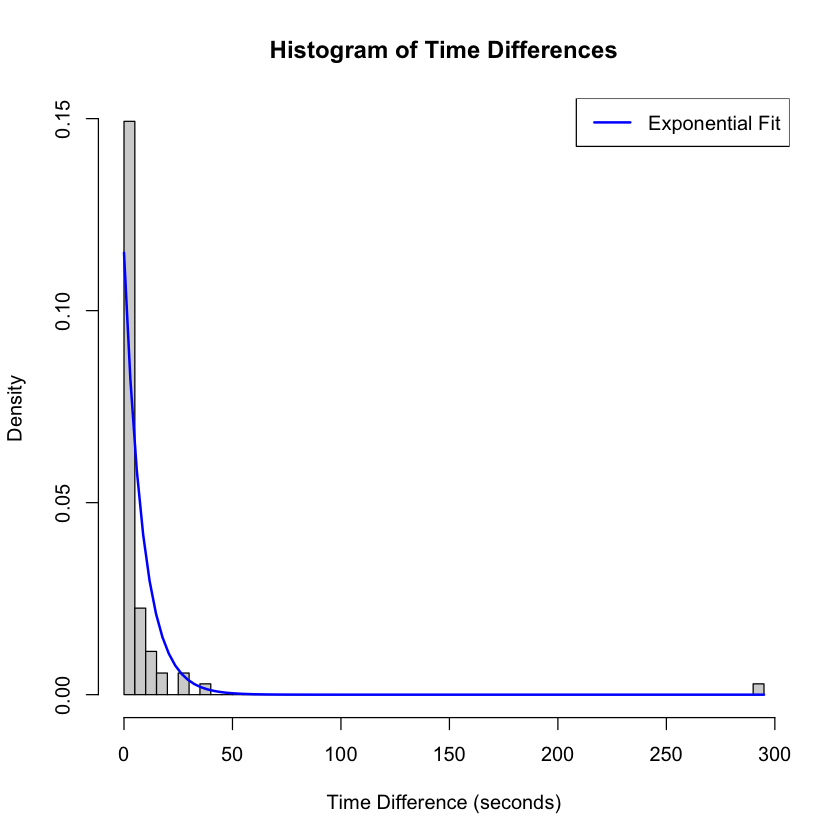

In [2]:
# Convert timestamps to POSIXct objects in BKK timezone
timestamps <- as.POSIXct(timestamps, format = "%m/%d/%Y %H:%M:%S", tz = "Asia/Bangkok")

# Calculate time differences in seconds
time_diff <- diff(timestamps)

# Convert time differences to numeric values in seconds
time_diff <- as.numeric(time_diff)

# Method of moments estimation for exponential distribution
lambda_hat <- 1/mean(time_diff)

# Fitted exponential distribution
fit_exp <- list(lambda = lambda_hat)

# Print the estimated lambda parameter
cat("Estimated lambda:", lambda_hat, "\n")

# Plot histogram of time differences with fitted exponential distribution
hist(time_diff, breaks = 50, freq = FALSE, main = "Histogram of Time Differences",
     xlab = "Time Difference (seconds)", ylab = "Density")
curve(dexp(x, rate = lambda_hat), add = TRUE, col = "blue", lwd = 2)

# Add legend
legend("topright", legend = c("Exponential Fit"), col = c("blue"), lwd = 2)
